In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('C:/Users/au723200/FEPCEU')

In [3]:
from enhanced_experiment import EnhancedTimeSeriesExperiment
from models.arima import Arima
from models.baseline import Baseline
from models.lgbm import LGBM
from models.neuralproph import Neuralprophet

from data.data_retriever import Dataretreiver

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [4]:
# Define models
models = {
    'BASELINE': Baseline(),
    'LGBM': LGBM(),
    'ARIMA': Arima(order=[1,0,1], seasonal_order=[1,1,1,24]),
    'NEURALPROPHET': Neuralprophet()
}

# Initialize the experiment
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)
# Define custom combinations of different measurement types with different areas
custom_combinations = [
    {
        #'temp': {1},
        'wind': {2,7,8,23,28,29,13,32,37,26},
        'sun': {13,14,18,19,17,22,26,27,32,33}
    },
]

# Experiment 1
No reduction, with custom areas. Additionally, models are trained with no exogenous variables

In [5]:
data = Dataretreiver(reduce=None, debug=True)
df = data.combined
# data.save("../results/reduction/fil_navn.csv") example

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    custom_feature_combinations=custom_combinations,
    add_all_columns=False,
    add_base_columns=False,
)

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Identified area columns: {'sun': {1: 'sun_area_1', 10: 'sun_area_10', 11: 'sun_area_11', 12: 'sun_area_12', 13: 'sun_area_13', 14: 'sun_area_14', 15: 'sun_area_15', 16: 'sun_area_16', 17: 'sun_area_17', 18: 'sun_area_18', 19: 'sun_area_19', 2: 'sun_area_2', 20: 'sun_area_20', 21: 'sun_area_21', 22: 'sun_area_22', 23: 'sun_area_23', 24: 'sun_area_24', 25: 'sun_area_25', 26: 'sun_area_26', 27: 'sun_area_27', 28: 'sun_area_28', 29: 'sun_area_29', 3: 'sun_area_3', 30: 'sun_area_30', 31: 'sun_area_31', 32: 'sun_area_32', 33: 'sun_area_33', 34: 'sun_area_34', 35: 'sun_area_35', 36: 'sun_area_36', 37: 'sun_area_37', 38: 'sun_area_38', 39: 'sun_area_39', 4: 'sun_area_4', 40: 'sun_area_40', 5: 'sun_area_5', 6: 'sun_area_6', 7: 'sun_area_7', 8: 'sun_area_8', 9: 'sun_area_

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_data_in_leaf': 36, 'learning_rate': 0.3034197975595473, 'feature_fraction': 0.9901087282940684, 'max_bin': 218, 'reg_alpha': 0.5148328095942376, 'reg_lambda': 0.7754376510179899}
  Backtesting metric: 186.50385994765412
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Running CV split 2/5 for feature group custom_area_0


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_data_in_leaf': 105, 'learning_rate': 0.12106754990104161, 'feature_fraction': 0.9291874835747144, 'max_bin': 139, 'reg_alpha': 0.016279994350587745, 'reg_lambda': 0.76060461497565}
  Backtesting metric: 186.08424455532324
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Running CV split 3/5 for feature group custom_area_0


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 4, 'min_data_in_leaf': 117, 'learning_rate': 0.11218157481426247, 'feature_fraction': 0.9209820842024943, 'max_bin': 171, 'reg_alpha': 0.2653084289324298, 'reg_lambda': 0.984400459718684}
  Backtesting metric: 180.97727726707626
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Running CV split 4/5 for feature group custom_area_0


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 96, 'learning_rate': 0.27751275724475644, 'feature_fraction': 0.5146034319948927, 'max_bin': 190, 'reg_alpha': 0.4447822998528971, 'reg_lambda': 0.01401583693402808}
  Backtesting metric: 196.30697642344606
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Running CV split 5/5 for feature group custom_area_0


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 31, 'learning_rate': 0.32631417602951285, 'feature_fraction': 0.8688079411830374, 'max_bin': 114, 'reg_alpha': 0.9683999802520469, 'reg_lambda': 0.35358771689006163}
  Backtesting metric: 189.78456106992692
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



In [6]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')

                          BASELINE                LGBM               ARIMA  \
custom_area_0  259.3271 ± 126.1766  178.7263 ± 19.5479  161.3164 ± 37.3281   

                     NEURALPROPHET  
custom_area_0  241.7846 ± 217.7317  
                          BASELINE                LGBM               ARIMA  \
custom_area_0  320.7175 ± 138.3372  225.0764 ± 23.5805  202.8125 ± 41.6714   

                     NEURALPROPHET  
custom_area_0  241.7846 ± 217.7317  


In [7]:
experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_1_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_1_results_20250506_133617.csv


# Experiment 2
PCA pure reduction. No custom areas

In [8]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [9]:
data = Dataretreiver(reduce='pca_pure', debug=True)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_notemp/experiment_2_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:155: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:156: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:165: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Top columns selected: ['sun_area_36', 'sun_area_21', 'sun_area_31', 'sun_area_6', 'sun_area_5', 'sun_area_1', 'sun_area_16', 'sun_area_11', 'sun_area_4', 'sun_area_22']
Top columns selected: ['wind_area_5', 'wind_area_36', 'wind_area_31', 'wind_area_15', 'wind_area_29', 'wind_area_40', 'wind_area_1', 'wind_area_20', 'wind_area_2', 'wind_area_25']
Top columns selected: ['temp_area_25', 'temp_area_15', 'temp_area_36', 'temp_area_40', 'temp_area_14', 'temp_area_11', 'temp_area_39', 'temp_area_20', 'temp_area_19', 'temp_area_37']
Saved selected area columns to ../results/reduction_notemp/experiment_2_areas_pca_pure_20250506_133618.csv
Identified area columns: {'sun': {36: 'sun_area_36', 21: 'sun_area_21', 31: 'sun_area_31', 6: 'sun_area_6', 5: 'sun_area_5', 1: 'sun_

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 900, 'max_depth': 4, 'min_data_in_leaf': 117, 'learning_rate': 0.2905039091708218, 'feature_fraction': 0.5478562583061936, 'max_bin': 227, 'reg_alpha': 0.6272489720512687, 'reg_lambda': 0.7234163581899548}
  Backtesting metric: 199.69506024352884
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 2/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_data_in_leaf': 105, 'learning_rate': 0.12106754990104161, 'feature_fraction': 0.9291874835747144, 'max_bin': 139, 'reg_alpha': 0.016279994350587745, 'reg_lambda': 0.76060461497565}
  Backtesting metric: 185.78547210251756
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 3/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 300, 'max_depth': 8, 'min_data_in_leaf': 108, 'learning_rate': 0.11846924839776829, 'feature_fraction': 0.5938428419162818, 'max_bin': 228, 'reg_alpha': 0.4959479052486556, 'reg_lambda': 0.4820090482943231}
  Backtesting metric: 189.57523275454537
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 4/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 900, 'max_depth': 5, 'min_data_in_leaf': 25, 'learning_rate': 0.22889504764835442, 'feature_fraction': 0.5880776215459993, 'max_bin': 220, 'reg_alpha': 0.8864717945956974, 'reg_lambda': 0.7932837097615903}
  Backtesting metric: 190.28508986042826
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 5/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 32, 'learning_rate': 0.3858533805337025, 'feature_fraction': 0.6564540780078124, 'max_bin': 125, 'reg_alpha': 0.7953977941366382, 'reg_lambda': 0.006655910930185915}
  Backtesting metric: 200.79400168497727
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




In [10]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')

                      BASELINE                LGBM               ARIMA  \
all_areas  259.3271 ± 126.1766  161.7370 ± 32.0103  165.5935 ± 39.1637   

                 NEURALPROPHET  
all_areas  246.8271 ± 180.0591  
                      BASELINE                LGBM               ARIMA  \
all_areas  320.7175 ± 138.3372  207.0207 ± 42.6620  206.5222 ± 46.9689   

                 NEURALPROPHET  
all_areas  246.8271 ± 180.0591  


In [11]:
experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_2_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_2_results_20250506_135829.csv


# Experiment 3
PCA KMeans reduction. No custom areas

In [7]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:155: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:156: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:165: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.




PCA explained variance ratio: 75.19% total variance retained

Selected representative wind points:
['sun_area_23', 'sun_area_8', 'sun_area_39', 'sun_area_9', 'sun_area_16', 'sun_area_31', 'sun_area_30', 'sun_area_33', 'sun_area_6', 'sun_area_20']


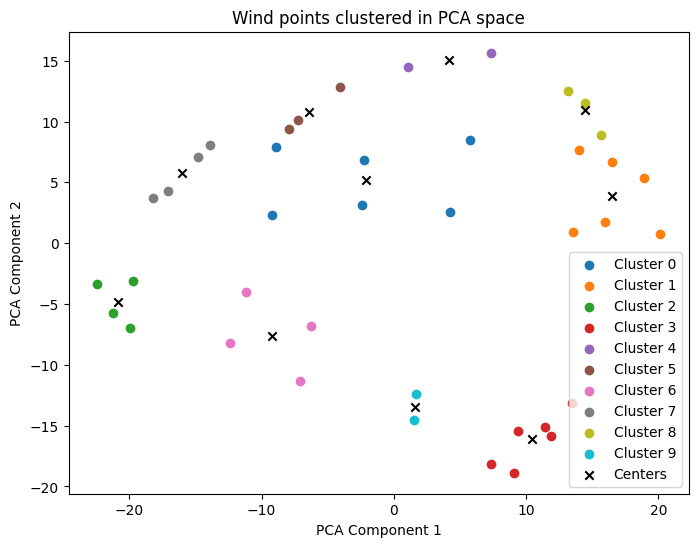

PCA explained variance ratio: 88.35% total variance retained

Selected representative wind points:
['wind_area_22', 'wind_area_34', 'wind_area_7', 'wind_area_10', 'wind_area_16', 'wind_area_32', 'wind_area_24', 'wind_area_31', 'wind_area_1', 'wind_area_5']


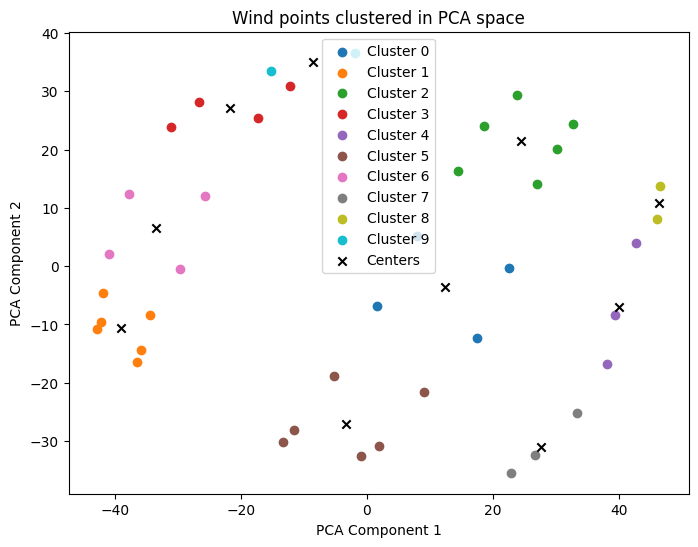

PCA explained variance ratio: 87.12% total variance retained

Selected representative wind points:
['temp_area_22', 'temp_area_2', 'temp_area_26', 'temp_area_40', 'temp_area_20', 'temp_area_28', 'temp_area_24', 'temp_area_37', 'temp_area_5', 'temp_area_36']


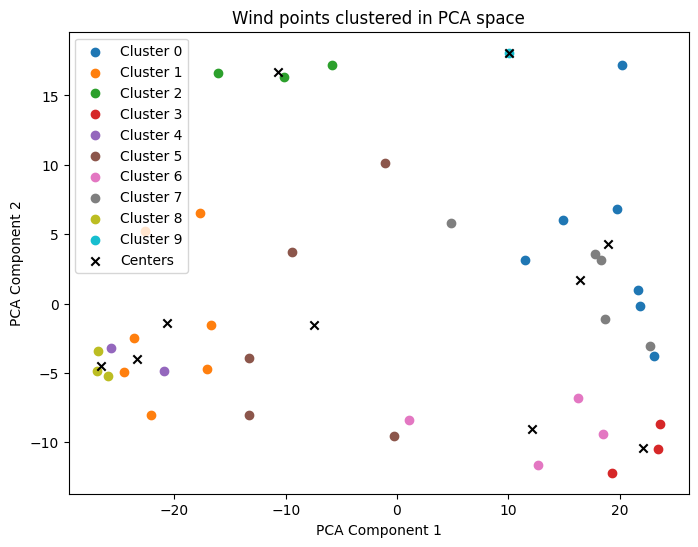

Saved selected area columns to ../results/reduction_notemp/experiment_3_areas_pca_kmeans_20250507_113458.csv
Identified area columns: {'sun': {23: 'sun_area_23', 8: 'sun_area_8', 39: 'sun_area_39', 9: 'sun_area_9', 16: 'sun_area_16', 31: 'sun_area_31', 30: 'sun_area_30', 33: 'sun_area_33', 6: 'sun_area_6', 20: 'sun_area_20'}, 'wind': {22: 'wind_area_22', 34: 'wind_area_34', 7: 'wind_area_7', 10: 'wind_area_10', 16: 'wind_area_16', 32: 'wind_area_32', 24: 'wind_area_24', 31: 'wind_area_31', 1: 'wind_area_1', 5: 'wind_area_5'}}
Cross-validation splits with sliding window:
Split 1: Train start = 2024-01-01 00:00:00 (index 0), Train end = 2024-06-29 20:00:00 (index 4340), Test end = 2024-07-07 19:00:00 (index 4531), Training size = 4340
Split 2: Train start = 2024-01-09 00:00:00 (index 192), Train end = 2024-07-07 20:00:00 (index 4532), Test end = 2024-07-15 19:00:00 (index 4723), Training size = 4340
Split 3: Train start = 2024-01-17 00:00:00 (index 384), Train end = 2024-07-15 20:00:00 (

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 1000, 'max_depth': 3, 'min_data_in_leaf': 25, 'learning_rate': 0.3237547055740914, 'feature_fraction': 0.9723321783937202, 'max_bin': 249, 'reg_alpha': 0.8247581533979889, 'reg_lambda': 0.2651957480262185}
  Backtesting metric: 200.53973159490096
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 2/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.3682846197929571, 'feature_fraction': 0.6497975335887827, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387433}
  Backtesting metric: 203.17737463971764
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 3/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 700, 'max_depth': 4, 'min_data_in_leaf': 85, 'learning_rate': 0.020886337971098762, 'feature_fraction': 0.805029885015916, 'max_bin': 187, 'reg_alpha': 0.2373339424757802, 'reg_lambda': 0.9925168329061415}
  Backtesting metric: 192.23191820620428
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 4/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 1000, 'max_depth': 9, 'min_data_in_leaf': 26, 'learning_rate': 0.08669272097448974, 'feature_fraction': 0.5977982191533258, 'max_bin': 64, 'reg_alpha': 0.2922174014539369, 'reg_lambda': 0.42419466168949144}
  Backtesting metric: 190.1403572738133
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 5/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 25, 'learning_rate': 0.3260203445997481, 'feature_fraction': 0.8594596364484144, 'max_bin': 132, 'reg_alpha': 0.9983199059764084, 'reg_lambda': 0.32121257564389666}
  Backtesting metric: 192.99113616478564
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




In [8]:
data = Dataretreiver(reduce='pca_kmeans', debug=True)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_notemp/experiment_3_areas.csv")

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

In [14]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')

                      BASELINE                LGBM               ARIMA  \
all_areas  259.3271 ± 126.1766  155.2743 ± 26.8175  160.0441 ± 35.1837   

                 NEURALPROPHET  
all_areas  263.7141 ± 181.9887  
                      BASELINE                LGBM               ARIMA  \
all_areas  320.7175 ± 138.3372  199.8257 ± 37.0646  201.4450 ± 41.5917   

                 NEURALPROPHET  
all_areas  263.7141 ± 181.9887  


In [9]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)

In [15]:
experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_3_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_3_results_20250506_142027.csv


# Experiment 4
Pearson reduction

In [16]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [17]:
data = Dataretreiver(reduce='pearson', debug=True)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_notemp/experiment_4_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:155: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:156: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:165: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Top 10 most correlated with elspot price:
sun_area_6: correlation = -0.2910
sun_area_11: correlation = -0.2882
sun_area_1: correlation = -0.2874
sun_area_16: correlation = -0.2839
sun_area_7: correlation = -0.2830
sun_area_2: correlation = -0.2830
sun_area_3: correlation = -0.2828
sun_area_21: correlation = -0.2828
sun_area_8: correlation = -0.2814
sun_area_26: correlation = -0.2802
Top 10 most correlated with elspot price:
wind_area_12: correlation = -0.4016
wind_area_13: correlation = -0.3981
wind_area_17: correlation = -0.3916
wind_area_16: correlation = -0.3907
wind_area_18: correlation = -0.3902
wind_area_27: correlation = -0.3849
wind_area_7: correlation = -0.3843
wind_area_11: correlation = -0.3812
wind_area_6: correlation = -0.3740
wind_area_22: correlat

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 800, 'max_depth': 3, 'min_data_in_leaf': 36, 'learning_rate': 0.3143620826780451, 'feature_fraction': 0.9914051578268095, 'max_bin': 250, 'reg_alpha': 0.07105799362654615, 'reg_lambda': 0.35263538940871203}
  Backtesting metric: 196.57365149779622
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 2/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.3682846197929571, 'feature_fraction': 0.6497975335887827, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387433}
  Backtesting metric: 203.17737463971764
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 3/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 900, 'max_depth': 5, 'min_data_in_leaf': 115, 'learning_rate': 0.24367468230734868, 'feature_fraction': 0.824587787797168, 'max_bin': 236, 'reg_alpha': 0.2653084289324298, 'reg_lambda': 0.011346512468275893}
  Backtesting metric: 179.22975598275679
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 4/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_data_in_leaf': 77, 'learning_rate': 0.39054294378818616, 'feature_fraction': 0.91868582403777, 'max_bin': 136, 'reg_alpha': 0.38777064094205205, 'reg_lambda': 0.23616907749331872}
  Backtesting metric: 194.18204646564902
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 5/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 300, 'max_depth': 8, 'min_data_in_leaf': 90, 'learning_rate': 0.37773717317688404, 'feature_fraction': 0.9359480059310723, 'max_bin': 50, 'reg_alpha': 0.31377926323982896, 'reg_lambda': 0.14139284574514538}
  Backtesting metric: 188.515749622642
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




In [18]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')

                      BASELINE                LGBM               ARIMA  \
all_areas  259.3271 ± 126.1766  177.4736 ± 31.3329  159.9787 ± 40.5705   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  
                      BASELINE                LGBM               ARIMA  \
all_areas  320.7175 ± 138.3372  224.2323 ± 39.4980  200.3210 ± 47.5422   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  


In [19]:
experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_4_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_4_results_20250506_144248.csv


In [20]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)